In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")

df = pd.read_csv('fake reviews dataset.csv')


In [2]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [3]:
n_reviews, n_attributes = df.shape
print('Total Reviews: ',n_reviews)
print('Total Attributes: ',n_attributes)

Total Reviews:  40432
Total Attributes:  4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
#CHECKING THE NUMBER OF NULL VALUES ACROSS THE DATASET
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [7]:
cols = ['category','rating', 'label','text_']
textual_attributes = df[cols]
pd.DataFrame(textual_attributes).head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


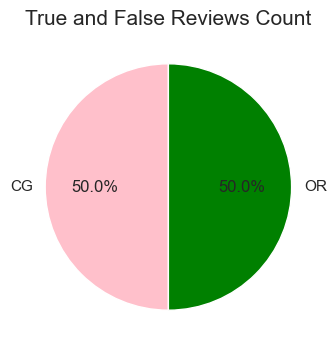

In [8]:
#PIE CHART ON VERFIED PURCHASES - check one
colors = ['pink','green']
plt.figure(figsize=(4,4))
label = df['label'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('True and False Reviews Count', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Review_Rating Grouped by True or False review')

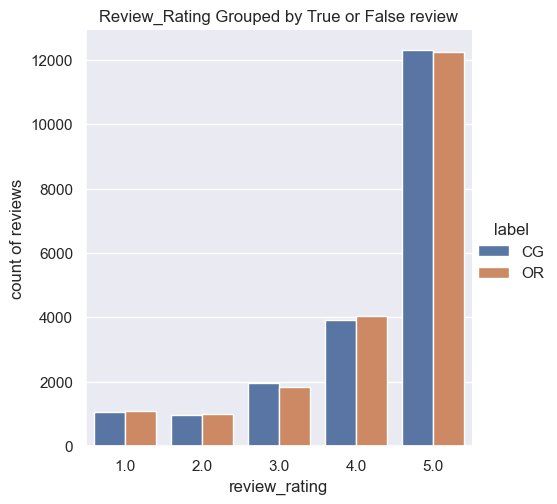

In [9]:
sns.catplot(x ='rating',kind="count", hue="label",
            data=df)
plt.xlabel("review_rating")
plt.ylabel("count of reviews")
plt.title("Review_Rating Grouped by True or False review")

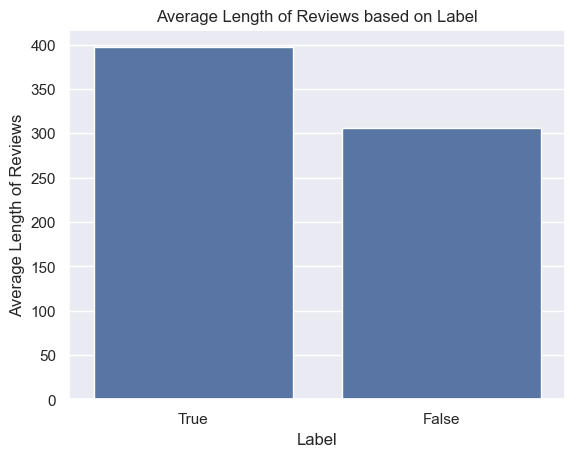

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it is already defined
cols = ["label", "text_"]
vprt = df[cols]  # making a subset of the dataframe

# FILTERING BASED ON TRUE AND FALSE VP
filtered_true = vprt[vprt["label"] == 'OR']
filtered_false = vprt[vprt["label"] == 'CG']

# AVERAGE REVIEW LENGTH BASED ON TRUE AND FALSE VP
true_average_length = filtered_true["text_"].apply(len).mean()
false_average_length = filtered_false["text_"].apply(len).mean()

# PLOTTING THE GRAPH
x = ["True", "False"]
y = [true_average_length, false_average_length]

sns.barplot(x=x, y=y)
plt.xlabel("Label")
plt.ylabel("Average Length of Reviews")
plt.title("Average Length of Reviews based on Label")
plt.show()


In [11]:
df.drop(['category'], axis=1, inplace=True)
df.head() 

,rating,label,text_
0,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,5.0,CG,"love it, a great upgrade from the original. I..."
2,5.0,CG,This pillow saved my back. I love the look and...
3,1.0,CG,"Missing information on how to use it, but it i..."
4,5.0,CG,Very nice set. Good quality. We have had the s...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  40432 non-null  float64
 1   label   40432 non-null  object 
 2   text_   40432 non-null  object 
dtypes: float64(1), object(2)
memory usage: 947.8+ KB


In [13]:
df.isnull().sum()

rating    0
label     0
text_     0
dtype: int64

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, float):
        return ""
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase and split into words
    words = text.lower().split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    # Return preprocessed text
    return ' '.join(words)

# Apply preprocessing to the review column
df['cleaned_review'] = df['text_'].apply(preprocess_text)

In [15]:
print(df['text_'],df['cleaned_review'])

0        Love this!  Well made, sturdy, and very comfor...
1        love it, a great upgrade from the original.  I...
2        This pillow saved my back. I love the look and...
3        Missing information on how to use it, but it i...
4        Very nice set. Good quality. We have had the s...
                               ...                        
40427    I had read some reviews saying that this bra r...
40428    I wasn't sure exactly what it would be. It is ...
40429    You can wear the hood by itself, wear it with ...
40430    I liked nothing about this dress. The only rea...
40431    I work in the wedding industry and have to wor...
Name: text_, Length: 40432, dtype: object 0            love well made sturdy comfortable love pretty
1             love great upgrade original mine couple year
2                  pillow saved back love look feel pillow
3              missing information use great product price
4                      nice set good quality set two month
              

In [16]:
df["label"].value_counts(normalize=True)

label
CG    0.5
OR    0.5
Name: proportion, dtype: float64

In [17]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
import warnings
warnings.simplefilter("ignore")

# Split the data into features (X) and labels (y)
X = df['cleaned_review']
y = df['label']

# Bag of Words
vectorizer = CountVectorizer(max_features=5000)
X_bow = vectorizer.fit_transform(X).toarray()

# Splitting the data into training and testing sets after applying CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
print('\nVocabulary: \n', vectorizer.vocabulary_)



Vocabulary: 
 {'love': 2623, 'well': 4862, 'made': 2647, 'sturdy': 4273, 'comfortable': 841, 'pretty': 3336, 'great': 1934, 'upgrade': 4697, 'original': 3044, 'mine': 2793, 'couple': 986, 'year': 4975, 'pillow': 3197, 'saved': 3775, 'back': 290, 'look': 2607, 'feel': 1626, 'missing': 2805, 'information': 2248, 'use': 4713, 'product': 3368, 'price': 3341, 'nice': 2932, 'set': 3883, 'good': 1895, 'quality': 3439, 'two': 4641, 'month': 2832, 'wanted': 4806, 'different': 1214, 'flavor': 1694, 'perfect': 3154, 'touch': 4552, 'thing': 4464, 'wish': 4909, 'little': 2580, 'space': 4101, 'done': 1284, 'fit': 1677, 'edge': 1391, 'extra': 1562, 'big': 405, 'number': 2974, 'easy': 1384, 'read': 3499, 'like': 2546, 'size': 3990, 'son': 4082, 'comforter': 843, 'also': 131, 'baby': 289, 'advertised': 80, 'th': 4441, 'one': 3018, 'problem': 3361, 'really': 3512, 'handy': 1999, 'kid': 2402, 'tool': 4536, 'included': 2222, 'package': 3074, 'someone': 4076, 'say': 3780, 'flimsy': 1706, 'would': 4946, 'e

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import numpy as np

def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

In [19]:
from sklearn.metrics import accuracy_score, classification_report

rf_best = RandomForestClassifier(max_depth=20, n_estimators=300)
train_and_evaluate(rf_best, X_train, X_test, y_train, y_test, "Random Forest")

Accuracy for Random Forest: 0.8087
              precision    recall  f1-score   support

          CG       0.81      0.81      0.81      4016
          OR       0.81      0.81      0.81      4071

    accuracy                           0.81      8087
   macro avg       0.81      0.81      0.81      8087
weighted avg       0.81      0.81      0.81      8087



In [20]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define model
xgb_best = xgb.XGBClassifier(max_depth=4, n_estimators=200, use_label_encoder=False, eval_metric='logloss')

train_and_evaluate(xgb_best, X_train, X_test, y_train_encoded, y_test_encoded, "XGBoost")


Accuracy for XGBoost: 0.8444
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4016
           1       0.85      0.84      0.84      4071

    accuracy                           0.84      8087
   macro avg       0.84      0.84      0.84      8087
weighted avg       0.84      0.84      0.84      8087



In [21]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

X_bert = np.array([get_bert_embedding(review) for review in X])
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X_bert, y, test_size=0.2, random_state=42)

In [22]:
rf_best_bert = RandomForestClassifier(max_depth=20, n_estimators=300)
train_and_evaluate(rf_best_bert, X_train_bert, X_test_bert, y_train, y_test, "Random Forest (BERT)")

xgb_best_bert = xgb.XGBClassifier(max_depth=4, n_estimators=100, use_label_encoder=False, eval_metric='logloss')
train_and_evaluate(xgb_best_bert, X_train_bert, X_test_bert, y_train_encoded, y_test_encoded, "XGBoost (BERT)")

Accuracy for Random Forest (BERT): 0.7924
              precision    recall  f1-score   support

          CG       0.77      0.83      0.80      4016
          OR       0.82      0.75      0.79      4071

    accuracy                           0.79      8087
   macro avg       0.79      0.79      0.79      8087
weighted avg       0.79      0.79      0.79      8087

Accuracy for XGBoost (BERT): 0.8108
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4016
           1       0.82      0.80      0.81      4071

    accuracy                           0.81      8087
   macro avg       0.81      0.81      0.81      8087
weighted avg       0.81      0.81      0.81      8087



In [23]:
# Splitting data into training and testing sets for both BoW and BERT
X_train_bow, X_test_bow, X_train_bert, X_test_bert, y_train, y_test = train_test_split(
    X_bow, X_bert, y, test_size=0.2, random_state=42)

# Concatenate BoW and BERT embeddings horizontally
X_train_hybrid = np.concatenate((X_train_bow, X_train_bert), axis=1)
X_test_hybrid = np.concatenate((X_test_bow, X_test_bert), axis=1)

In [24]:
# Define base models
from sklearn.ensemble import StackingClassifier

base_models = [
    ('random_forest', RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)),
    ('xgboost', xgb.XGBClassifier(max_depth=4, n_estimators=200, use_label_encoder=False, eval_metric='logloss'))
]

# Define meta-learner
meta_model = LogisticRegression(random_state=42)

# Define stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train and evaluate stacked model
stacking_classifier.fit(X_train_hybrid, y_train)
y_pred = stacking_classifier.predict(X_test_hybrid)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacked Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Stacked Model Accuracy: 0.8645
              precision    recall  f1-score   support

          CG       0.86      0.87      0.86      4016
          OR       0.87      0.86      0.86      4071

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087



Confusion Matrix:


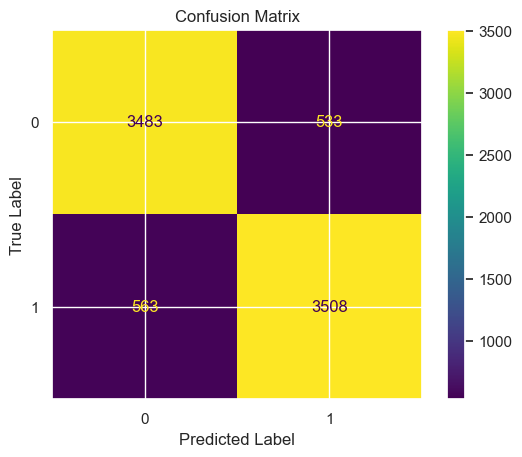

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Print detailed classification report
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png') 
plt.show()

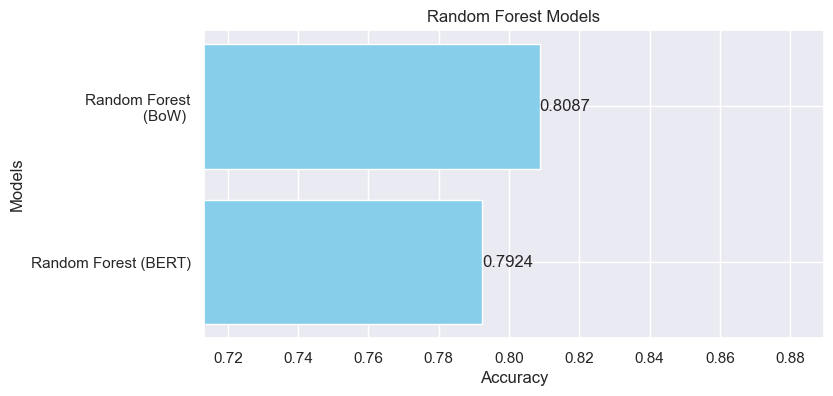

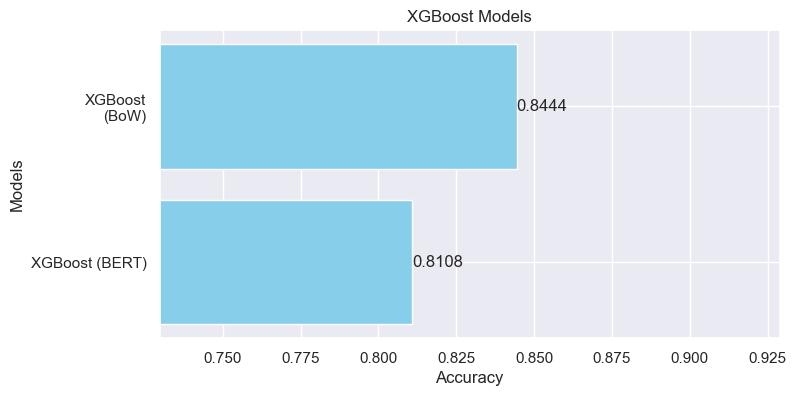

In [27]:
import matplotlib.pyplot as plt
import numpy as np


random_forest_models = [
    "Random Forest\n(BoW) ",
    "Random Forest (BERT)"
]

xgboost_models = [
    "XGBoost\n(BoW)" ,
    "XGBoost (BERT)"
]

stacking_classifier_models = [
    "Stacking\n(HYBRID)"
]

# Accuracy scores for each model (replace with actual accuracies)
accuracies = [
    0.8087,  # Random Forest
    0.7924,  # Random Forest (BERT)
    0.8444,  # XGBoost 
    0.8108,  # XGBoost (BERT)
    0.8645,  # Stacking Classifier 
]

# Map model names to accuracies
model_accuracy_map = dict(zip(
     random_forest_models + xgboost_models +  stacking_classifier_models,
    accuracies
))

# Function to plot bar graph for a given set of models
def plot_model_accuracies(model_names, title):
    plt.figure(figsize=(8, 4))
    accuracies = [model_accuracy_map[model] for model in model_names]
    plt.barh(model_names, accuracies, color='skyblue')
    plt.xlabel('Accuracy')
    plt.ylabel('Models')
    plt.title(title)
    plt.xlim(0.9 * min(accuracies), 1.1 * max(accuracies)) 
    plt.gca().invert_yaxis()
    for i in range(len(accuracies)):
        plt.text(accuracies[i], i, f'{accuracies[i]:.4f}', va='center', ha='left')
    plt.show()

# Plot for each classifier type
plot_model_accuracies(random_forest_models, 'Random Forest Models')
plot_model_accuracies(xgboost_models, 'XGBoost Models') 

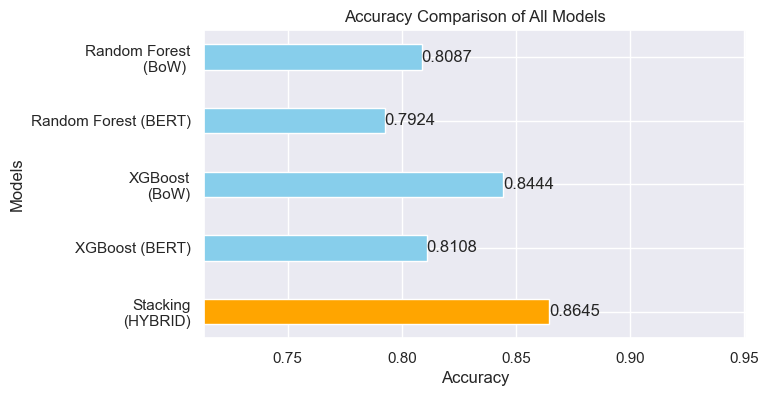

In [28]:
# Plot for all models
plt.figure(figsize=(7, 4))
colors = ['skyblue' if 'HYBRID' not in name else 'orange' for name in model_accuracy_map.keys()]
plt.barh(list(model_accuracy_map.keys()), list(model_accuracy_map.values()), color=colors, height=0.4)
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Accuracy Comparison of All Models')
plt.xlim(0.9 * min(model_accuracy_map.values()), 1.1 * max(model_accuracy_map.values()))
plt.gca().invert_yaxis()
for i, (name, accuracy) in enumerate(model_accuracy_map.items()):
    plt.text(accuracy, i, f'{accuracy:.4f}', va='center', ha='left')
plt.savefig('accuracy_comparison_plot.png', bbox_inches='tight') 
plt.show()

In [29]:
# Generate probabilities for ROC curves
rf_bow_probs = rf_best.predict_proba(X_test_bow)[:, 1]
xgb_bow_probs = xgb_best.predict_proba(X_test_bow)[:, 1]
rf_bert_probs = rf_best_bert.predict_proba(X_test_bert)[:, 1]
xgb_bert_probs = xgb_best_bert.predict_proba(X_test_bert)[:, 1]
stacking_probs = stacking_classifier.predict_proba(X_test_hybrid)[:, 1]



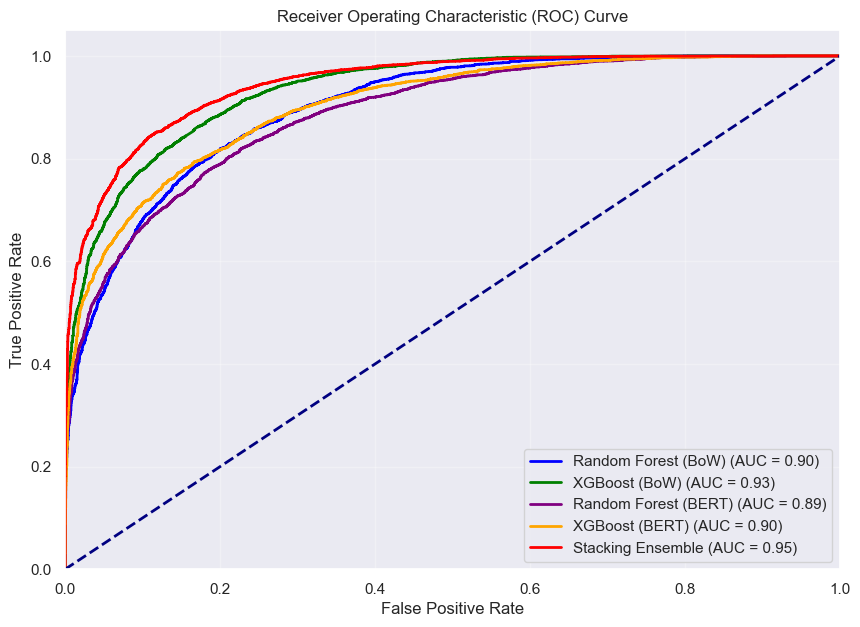

In [30]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
rf_bow_fpr, rf_bow_tpr, _ = roc_curve(y_test_encoded, rf_bow_probs)
xgb_bow_fpr, xgb_bow_tpr, _ = roc_curve(y_test_encoded, xgb_bow_probs)
rf_bert_fpr, rf_bert_tpr, _ = roc_curve(y_test_encoded, rf_bert_probs)
xgb_bert_fpr, xgb_bert_tpr, _ = roc_curve(y_test_encoded, xgb_bert_probs)
stacking_fpr, stacking_tpr, _ = roc_curve(y_test_encoded, stacking_probs)

rf_bow_auc = auc(rf_bow_fpr, rf_bow_tpr)
xgb_bow_auc = auc(xgb_bow_fpr, xgb_bow_tpr)
rf_bert_auc = auc(rf_bert_fpr, rf_bert_tpr)
xgb_bert_auc = auc(xgb_bert_fpr, xgb_bert_tpr)
stacking_auc = auc(stacking_fpr, stacking_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(rf_bow_fpr, rf_bow_tpr, color='blue', lw=2, label=f'Random Forest (BoW) (AUC = {rf_bow_auc:.2f})')
plt.plot(xgb_bow_fpr, xgb_bow_tpr, color='green', lw=2, label=f'XGBoost (BoW) (AUC = {xgb_bow_auc:.2f})')
plt.plot(rf_bert_fpr, rf_bert_tpr, color='purple', lw=2, label=f'Random Forest (BERT) (AUC = {rf_bert_auc:.2f})')
plt.plot(xgb_bert_fpr, xgb_bert_tpr, color='orange', lw=2, label=f'XGBoost (BERT) (AUC = {xgb_bert_auc:.2f})')
plt.plot(stacking_fpr, stacking_tpr, color='red', lw=2, label=f'Stacking Ensemble (AUC = {stacking_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig('roc.png')
plt.show()